In [1]:
from datetime import date
date.today()

datetime.date(2017, 12, 10)

In [2]:
author = "NirantK. https://github.com/NirantK/keras-practice"
print(author)

NirantK. https://github.com/NirantK/keras-practice


In [3]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import keras

Using TensorFlow backend.


In [5]:
keras.__version__

'2.0.8'

In [6]:
import os
if os.name=='nt':
    print('We are on Windows')

We are on Windows


Prerequisites: 
- Python programming experience
- Familiarity with machine learning vocabulary
   * Refer [Ailyen Blog](http://blog.aylien.com/10-machine-learning-terms-explained-in-simple/) - 5 minutes read or [Google's Machine Learning Glossary](https://developers.google.com/machine-learning/glossary/) when you see/hear new terms
    
Nice to have (will build upon these topics)
- Familiarity with deep feed forward networks
- Understand backpropagation 
- Familiarity with activation functions like relu, tanh, softmax, hierarchical softmax

**We will start with an introduction to the theory behind convnets, specifically:**

- What is convolution and max-pooling?   
- What are convnets?
- What do convnets learn?

Then we will cover image classification with **small datasets**:

- Training your own small convnets from scratch
- Using data augmentation to mitigate overfitting
- Using a pre-trained convnet to do feature extraction
- Fine-tuning a pre-trained convnet

We will use our convnet to classify **MNIST digits**

## In this notebook: 
- MNIST Demo
    - Using Convolution Layers
- Code Overview

### In next notebook:
- What is convolution and maxpooling? 
- What are convnets? 
- What do convnets learn? 

In [7]:
from keras import layers
from keras import models

model = models.Sequential()
# Conv2D(32, (3, 3), padding='same',
#                  input_shape=x_train.shape[1:])
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

The 6 lines of code show you what a basic convnet looks like. It’s a stack of ```Conv2D``` and ```MaxPooling2D``` layers. 

**We’ll see in a minute what they do concretely**

In [8]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


The next step would be to feed our last output tensor (of shape (3, 3, 64)) into a densely-connected classifier network like those you are already familiar with: *a stack of Dense layers*. 

These classifiers process vectors, which are 1D, whereas our current output is a 3D tensor. So first, we will have to flatten our 3D outputs to 1D, and then add a few Dense layers on top:

In [9]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                65600     
__________

In [11]:
num_classes = 10

In [15]:
from keras.datasets import cifar10
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

print('x_train shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

# train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [25]:
%time history = model.fit(train_images, train_labels, epochs=30, batch_size=128)

Epoch 1/30
50000/50000 [==============================] - 9s - loss: 1.0416 - acc: 0.6323     
Epoch 2/30
50000/50000 [==============================] - 8s - loss: 1.0094 - acc: 0.6457     
Epoch 3/30
50000/50000 [==============================] - 8s - loss: 0.9882 - acc: 0.6503     
Epoch 4/30
50000/50000 [==============================] - 8s - loss: 0.9634 - acc: 0.6583     
Epoch 5/30
50000/50000 [==============================] - 8s - loss: 0.9418 - acc: 0.6672     
Epoch 6/30
50000/50000 [==============================] - 8s - loss: 0.9234 - acc: 0.6761     
Epoch 7/30
50000/50000 [==============================] - 8s - loss: 0.9081 - acc: 0.6819     
Epoch 8/30
50000/50000 [==============================] - 8s - loss: 0.8896 - acc: 0.6882     
Epoch 9/30
50000/50000 [==============================] - 8s - loss: 0.8704 - acc: 0.6947     
Epoch 10/30
50000/50000 [==============================] - 8s - loss: 0.8578 - acc: 0.7002     
Epoch 11/30
50000/50000 [========================

**Model Performance**

In [26]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_acc

 9760/10000 [============================>.] - ETA: 0s

0.7641

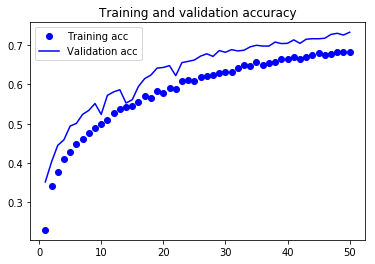

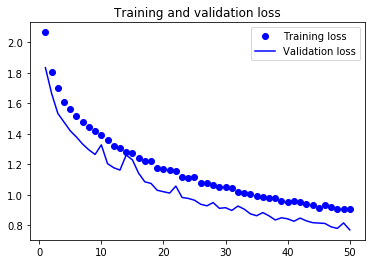

In [33]:
acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Let's try the model from the official documentation by Keras

In [28]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

In [29]:
batch_size = 32
num_classes = 10
epochs = 50
data_augmentation = True
num_predictions = 20
steps_per_epoch = 512
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

history = None
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

if not data_augmentation:
    print('Not using data augmentation.')
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)
else:
    print('Using real-time data augmentation.')
    # This will do preprocessing and realtime data augmentation:
    datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen.fit(x_train)

    # Fit the model on the batches generated by datagen.flow().
    history = model.fit_generator(datagen.flow(x_train, y_train,
                                     batch_size=batch_size),
                        epochs=epochs,
                        steps_per_epoch=steps_per_epoch,
                        validation_data=(x_test, y_test),
                        workers=4)

# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples
Using real-time data augmentation.
Epoch 1/50
512/512 [==============================] - 6s - loss: 2.0670 - acc: 0.2294 - val_loss: 1.8342 - val_acc: 0.3515
Epoch 2/50
512/512 [==============================] - 5s - loss: 1.8086 - acc: 0.3423 - val_loss: 1.6644 - val_acc: 0.4023
Epoch 3/50
512/512 [==============================] - 5s - loss: 1.7038 - acc: 0.3774 - val_loss: 1.5337 - val_acc: 0.4447
Epoch 4/50
512/512 [==============================] - 5s - loss: 1.6059 - acc: 0.4102 - val_loss: 1.4768 - val_acc: 0.4589
Epoch 5/50
512/512 [==============================] - 5s - loss: 1.5636 - acc: 0.4288 - val_loss: 1.4191 - val_acc: 0.4940
Epoch 6/50
512/512 [==============================] - 5s - loss: 1.5168 - acc: 0.4479 - val_loss: 1.3786 - val_acc: 0.5005
Epoch 7/50
512/512 [==============================] - 5s - loss: 1.4799 - acc: 0.4615 - val_loss: 1.3317 - val_acc: 0.5236
Epoch 8/50
512/512 [===========

In [30]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

 9952/10000 [============================>.] - ETA: 0sTest loss: 0.768504348373
Test accuracy: 0.7328


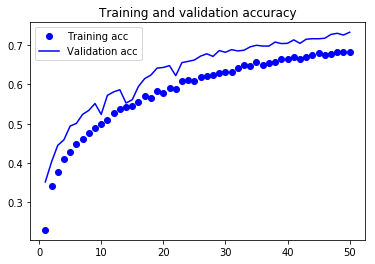

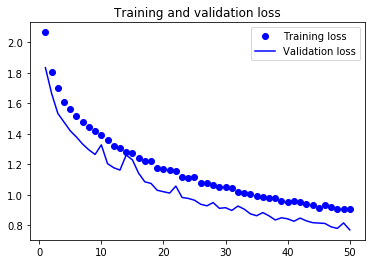

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()